In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading and checking the first five rows of the data set
df = pd.read_csv('Demographic data.csv')
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [4]:
# Total number of rows and columns in demographic data
df.shape

(71295, 12)

In [5]:
# Data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
# Total number of missing values, column wise
df.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [7]:
# Missing values in percentage
round(100*(df.isnull().sum())/len(df),2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [8]:
# Checking the total counts of non-default and default cases
df['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

In [9]:
# Dropping rows with null values since we have a lot of records & imputing Performance Tag will introduce bias
# more as it's the predictor column
df.dropna(inplace = True)

In [10]:
# Column wise missing values
df.isnull().sum()

Application ID                                 0
Age                                            0
Gender                                         0
Marital Status (at the time of application)    0
No of dependents                               0
Income                                         0
Education                                      0
Profession                                     0
Type of residence                              0
No of months in current residence              0
No of months in current company                0
Performance Tag                                0
dtype: int64

In [11]:
# Remaining count of rows and column post removal of records with null value
df.shape

(69721, 12)

In [12]:
# Creating a copy of df
dd = df.copy()

### EDA

In [13]:
# Total count of credit card applicants with age lesser than 18
(df['Age'] < 18).value_counts()

False    69659
True        62
Name: Age, dtype: int64

In [14]:
# Assuming a minimum age of 18 is required to get a credit card, we'll drop the records with age < 18
df.drop(df[df['Age'] < 18].index, inplace = True)
df.shape

(69659, 12)

In [15]:
# Bining the continuous feature - Age
bins = np.arange(10, df['Age'].max()+10, 10)
df['Age_bin'] = pd.cut(df['Age'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]"


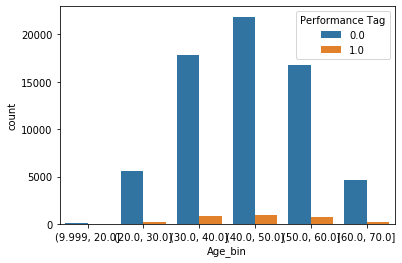

In [16]:
# Plotting Age_bin with Performance Tag
sns.countplot(data=df,x='Age_bin', hue="Performance Tag")
plt.show()

In [17]:
# Majority of default has happened from age group of 28 - 58. However we cannot assume this as the total count
# of default is very less

# Gender column
df['Gender'].value_counts()

M    53195
F    16464
Name: Gender, dtype: int64

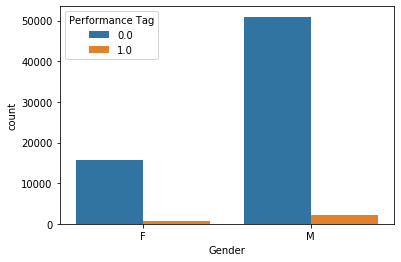

In [18]:
# Majority of applicants are male

# Plotting Gender with Performance Tag
sns.countplot(data=df,x='Gender', hue="Performance Tag")
plt.show()

In [19]:
# Males have defaulted in higher number which is due to higher number of male applicants

# Marital Status
df['Marital Status (at the time of application)'].value_counts()

Married    59388
Single     10271
Name: Marital Status (at the time of application), dtype: int64

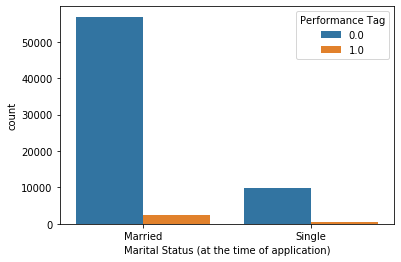

In [20]:
# Majority of applicants are Married

# Plotting Marital Status with Performance tag
sns.countplot(data = df, x = 'Marital Status (at the time of application)', hue = 'Performance Tag')
plt.show()

In [21]:
# Same result of Gender. We have more married defaulters due to higher number of married applicants

# No of dependents
df['No of dependents'].value_counts()

3.0    15591
1.0    15164
2.0    15080
4.0    11973
5.0    11851
Name: No of dependents, dtype: int64

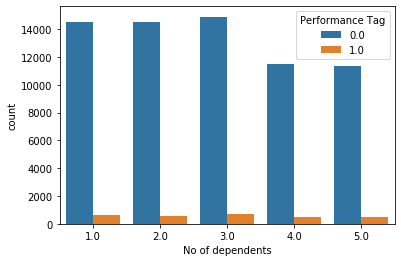

In [22]:
# We have even distribution of dependents

# Plotting dependents with Performance Tag
sns.countplot(data = df, x = 'No of dependents', hue = 'Performance Tag')
plt.show()

In [23]:
# Count of default is higher at 3 dependents but insignificant in comparison with other

# Income
df['Income'].min()

-0.5

In [24]:
# Dropping records with income less then 0, assuming that negative income is not possible
df.drop(df[df['Income'] < 0].index, inplace = True)

# Bining Income
bins = np.arange(0, df['Income'].max() + 10, 10)
df['Income_bin'] = pd.cut(df['Income'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]"


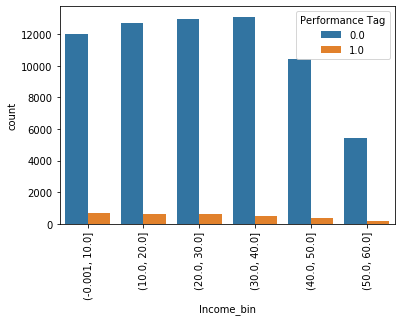

In [25]:
# Plotting Income_bin with Performance Tag
ax = sns.countplot(data = df, x = 'Income_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [26]:
# Decreasing default trend is observed with the increase in income

# Education
df['Education'].value_counts()

Professional    24312
Masters         23431
Bachelor        17265
Phd              4454
Others            117
Name: Education, dtype: int64

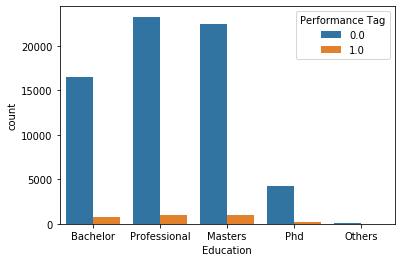

In [27]:
# Plotting education with Performance Tag
sns.countplot(data = df, x = 'Education', hue = 'Performance Tag')
plt.show()

In [28]:
# No defaulters in others, however insignificant strength for assumption.
# Count of defaulters is not significant in any education.

# Profession
df['Profession '].value_counts()

SAL        39524
SE_PROF    16177
SE         13878
Name: Profession , dtype: int64

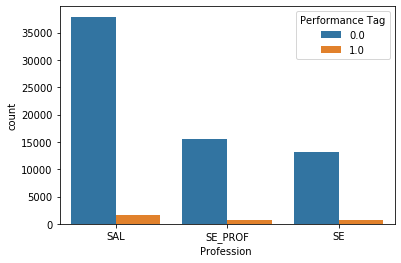

In [29]:
# Plotting Profession with Performance tag
sns.countplot(data = df, x = 'Profession ', hue = 'Performance Tag')
plt.show()

In [30]:
# SAL seems to have more defaulters but not significant

# Type of residence
df['Type of residence'].value_counts()

Rented                 52097
Owned                  13932
Living with Parents     1758
Company provided        1595
Others                   197
Name: Type of residence, dtype: int64

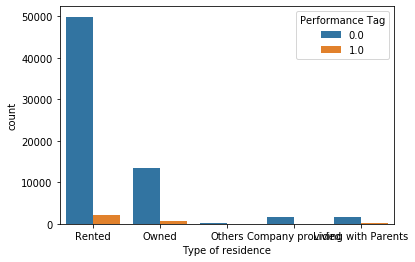

In [31]:
# Plotting Type of residence with Performance Tag
sns.countplot(data = df, x = 'Type of residence', hue = 'Performance Tag')
plt.show()

In [32]:
# Rented residence has significant number of defaulters

# No of months in current residence
(df['No of months in current residence']<1).value_counts()

False    69579
Name: No of months in current residence, dtype: int64

In [33]:
# Bining the No of months in current residence
bins = np.arange(0, df['No of months in current residence'].max() + 10, 10)
df['current_residence_bin'] = pd.cut(df['No of months in current residence'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin,current_residence_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]","(110.0, 120.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]","(110.0, 120.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]","(100.0, 110.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]","(90.0, 100.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]","(110.0, 120.0]"


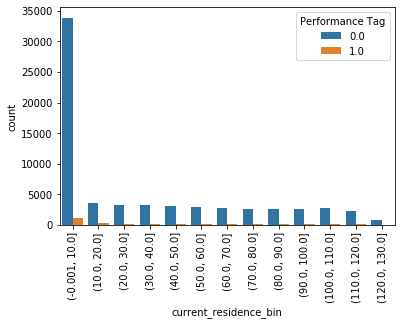

In [34]:
# Plotting the No of months in current residence with Performance Tag
ax = sns.countplot(data = df, x = 'current_residence_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [35]:
# Majority of defaulters are in 0-10 group of duration of stay

# No of months in current company
(df['No of months in current company']<1).value_counts()

False    69579
Name: No of months in current company, dtype: int64

In [36]:
# Bining the duration in current company
bins = np.arange(0, df['No of months in current company'].max() + 10, 10)
df['current_company_bin'] = pd.cut(df['No of months in current company'], bins, include_lowest = True)
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Age_bin,Income_bin,current_residence_bin,current_company_bin
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,"(40.0, 50.0]","(30.0, 40.0]","(110.0, 120.0]","(50.0, 60.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,"(30.0, 40.0]","(50.0, 60.0]","(110.0, 120.0]","(40.0, 50.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,"(30.0, 40.0]","(40.0, 50.0]","(100.0, 110.0]","(40.0, 50.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,"(40.0, 50.0]","(50.0, 60.0]","(90.0, 100.0]","(50.0, 60.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,"(30.0, 40.0]","(40.0, 50.0]","(110.0, 120.0]","(40.0, 50.0]"


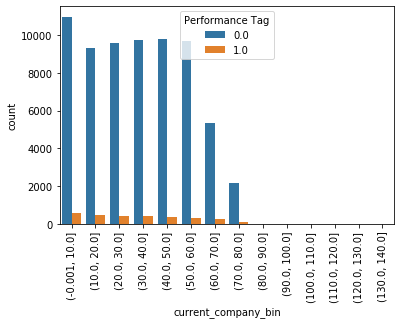

In [37]:
# Plotting No of months in current company with Performance Tag
ax = sns.countplot(data = df, x = 'current_company_bin', hue = 'Performance Tag')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [38]:
# Here we see a trend - decrease in number defaulter with increase in experience within the same company

In [39]:
# Copying the df dataframe into woe_data
woe_data = df.copy()

In [40]:
# Dropping few columns whose bins have been created
woe_data.drop(['Age','No of months in current company','No of months in current residence'], axis = 1, inplace = True)

In [41]:
# WOE_DATA
woe_data.head()

,Application ID,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,Performance Tag,Age_bin,Income_bin,current_residence_bin,current_company_bin
0,954457215,F,Married,2.0,40.0,Bachelor,SAL,Rented,0.0,"(40.0, 50.0]","(30.0, 40.0]","(110.0, 120.0]","(50.0, 60.0]"
1,432830445,M,Married,4.0,55.0,Professional,SE_PROF,Rented,0.0,"(30.0, 40.0]","(50.0, 60.0]","(110.0, 120.0]","(40.0, 50.0]"
2,941387308,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,0.0,"(30.0, 40.0]","(40.0, 50.0]","(100.0, 110.0]","(40.0, 50.0]"
3,392161677,M,Married,1.0,53.0,Bachelor,SE,Rented,0.0,"(40.0, 50.0]","(50.0, 60.0]","(90.0, 100.0]","(50.0, 60.0]"
4,182011211,F,Married,5.0,44.0,Professional,SAL,Rented,0.0,"(30.0, 40.0]","(40.0, 50.0]","(110.0, 120.0]","(40.0, 50.0]"


In [42]:
# Function to calculate WOE & IV
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [43]:
for col in woe_data.columns:
    if col == 'Performance Tag': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df1, iv = calculate_woe_iv(woe_data, col, 'Performance Tag')
        print(df1)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Application ID
           Value  All  Good  Bad  Distr_Good  Distr_Bad      WoE        IV
5103   653287861    2     1    1    0.000015    0.00034 -3.12088  0.001015
0      954457215    1     1    0    0.000015    0.00000  0.00000  0.000000
46376  789481818    1     1    0    0.000015    0.00000  0.00000  0.000000
46377  253182798    1     1    0    0.000015    0.00000  0.00000  0.000000
46378  555626075    1     1    0    0.000015    0.00000  0.00000  0.000000
...          ...  ...   ...  ...         ...        ...      ...       ...
23198  925646939    1     1    0    0.000015    0.00000  0.00000  0.000000
23199  344619950    1     1    0    0.000015    0.00000  0.00000  0.000000
23200  869773383    1     1    0    0.000015    0.00000  0.00000  0.000000
23186  615487774    1     1    0    0.000015    0.00000  0.00000  0.000000
69575   37493797    1     1    0    0.000015    0.00000  0.00000  0.000000

[69576 rows x 8 columns]
IV score: 0.00


WoE and IV for colu

#### The important features based on Information Value are - 
- current_residence_bin
- Income_bin
- current_company_bin

In [44]:
# Copying the earlier dataframe
df2 = df.copy()

### Data Preparation

In [45]:
# Removing features as per IV
df2.drop(['Age_bin','Income_bin','current_residence_bin','current_company_bin'], axis=1, inplace=True)
df2.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [46]:
# Removing features as per IV
df2.drop(['Age','Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ',
         'Type of residence'], axis=1, inplace=True)
df2.head()

,Application ID,Income,No of months in current residence,No of months in current company,Performance Tag
0,954457215,40.0,113,56,0.0
1,432830445,55.0,112,46,0.0
2,941387308,46.0,104,49,0.0
3,392161677,53.0,94,53,0.0
4,182011211,44.0,112,43,0.0


In [47]:
df2 = df2.set_index('Application ID')

In [48]:
# Importing library to split the data set into train and test
from sklearn.model_selection import train_test_split

In [49]:
# Every other feature except Performance Tag in X
X = df2.drop(['Performance Tag'], axis=1)

# Storing performance tag in y
y = df2['Performance Tag']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

#### Scaling

In [51]:
# Importing library for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the train data
df2_train = scaler.fit_transform(X_train)

In [52]:
# Scaling the test data
df2_test = scaler.transform(X_test)

### Modelling

In [53]:
# Importing statsmodels for statistical summary
import statsmodels.api as sm

In [54]:
# Importing Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [55]:
# Fitting the model - Model 1
logm1 = sm.GLM(y_train,(sm.add_constant(df2_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48705
Model:                            GLM   Df Residuals:                    48701
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8384.2
Date:                Sun, 01 Mar 2020   Deviance:                       16768.
Time:                        22:29:10   Pearson chi2:                 4.88e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1598      0.023   -136.183      0.000      -3.205      -3.114
x1            -0.1996      0.023     -8.506      0.000      -0.246      -0.154
x2             0.0536      0.022      2.408      0.016       0.010       0.097
x3            -0.1067      0.023     -4.629      0.000      -0.152      -0.061
==============================================================================
"""

In [56]:
# Fitting the model - Model 2
logistic = LogisticRegression(class_weight = 'balanced')

logistic.fit(df2_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Importing library
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [58]:
# Predict default for test data
y_pred = logistic.predict(df2_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average = 'binary')
print("Sensiticity: \t", round(sensitivity,2),'\n','Specificity: \t',round(specificity,2), sep = '')

# check area under curve
y_pred_prob = logistic.predict_proba(df2_test)[:,1]
print('AUC: \t',round(roc_auc_score(y_test, y_pred_prob),2))

[[10780  9183]
 [  408   503]]
Sensiticity: 	0.55
Specificity: 	0.54
AUC: 	 0.57


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69     19963
         1.0       0.05      0.55      0.09       911

    accuracy                           0.54     20874
   macro avg       0.51      0.55      0.39     20874
weighted avg       0.92      0.54      0.67     20874



## Credit Bureau

In [60]:
# Loading the second data set
cb = pd.read_csv('Credit Bureau data.csv')
cb.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [61]:
# Total rows and columns
cb.shape

(71295, 19)

In [62]:
# data types of columns
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [63]:
# count of null values across columns
cb.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [64]:
# percentage of null values in columns
round(100*(cb.isnull().sum())/len(cb),2)

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

In [65]:
# Dropping records with null value
cb.dropna(inplace=True)
cb.shape

(68847, 19)

In [66]:
df = df.set_index('Application ID')
cb = cb.set_index('Application ID')

In [67]:
# merging the demographic and credit bureau data
merged = df.merge(cb, left_index = True, right_index = True)
merged.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
Application ID,,,,,,,,,,,,,,,,,,,,,
100450,52,M,Married,4.0,32.0,Professional,SE_PROF,Rented,79,3,...,8,2,5,1,3,1.0,3903438.0,9,0,0.0
128993,36,M,Married,4.0,13.0,Professional,SAL,Rented,6,21,...,6,1,4,4,7,0.0,741058.0,8,0,1.0
142768,55,M,Married,1.0,29.0,Phd,SAL,Rented,46,3,...,7,2,4,1,2,0.0,815325.0,9,0,0.0
176721,55,M,Married,3.0,53.0,Professional,SE_PROF,Rented,6,27,...,1,0,1,2,3,0.0,209593.0,3,0,0.0
197956,28,F,Married,3.0,35.0,Masters,SAL,Rented,6,43,...,13,5,5,6,11,0.0,992024.0,25,0,0.0


In [68]:
merged.shape

(68570, 33)

In [69]:
merged.isnull().sum()

Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag_x                                                  0
Age_bin                                                            0
Income_bin                                                         0
current_residence_bin                                              0
current_company_bin               

### EDA

In [70]:
# Bining few feaures
merged['Avgas CC Utilization in last 12 months_Bins']  = pd.cut(merged['Avgas CC Utilization in last 12 months'] , 10, include_lowest=True)
merged['No of trades opened in last 6 months_Bins']  = pd.cut(merged['No of trades opened in last 6 months'] , 10, include_lowest=True)
merged['No of trades opened in last 12 months_Bins']  = pd.cut(merged['No of trades opened in last 12 months'] , 10, include_lowest=True)
merged['No of PL trades opened in last 6 months_Bins']  = pd.cut(merged['No of PL trades opened in last 6 months'] , 10, include_lowest=True)
merged['No of PL trades opened in last 12 months_Bins']  = pd.cut(merged['No of PL trades opened in last 6 months'] , 10, include_lowest=True)
merged['No of Inquiries in last 6 months (excluding home & auto loans)_Bins']  = pd.cut(merged['No of Inquiries in last 6 months (excluding home & auto loans)'] , 10, include_lowest=True)
merged['No of Inquiries in last 12 months (excluding home & auto loans)_Bins']  = pd.cut(merged['No of Inquiries in last 12 months (excluding home & auto loans)'] , 10, include_lowest=True)
merged['Total No of Trades_Bins']  = pd.cut(merged['Total No of Trades'] , 10, include_lowest=True)

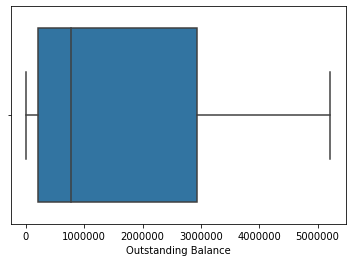

In [71]:
# Outstanding Balance
sns.boxplot(x='Outstanding Balance', data=merged)
plt.show()

In [72]:
woe_df = merged.drop(['Age', 'No of months in current residence', 'No of months in current company','Income','Performance Tag_y',
                      'Avgas CC Utilization in last 12 months','No of trades opened in last 6 months','No of trades opened in last 12 months',
                     'No of PL trades opened in last 6 months','No of PL trades opened in last 12 months',
                     'No of Inquiries in last 6 months (excluding home & auto loans)','No of Inquiries in last 12 months (excluding home & auto loans)',
                     'Total No of Trades'], axis=1)

In [73]:
for col in woe_df.columns:
    if col == 'Performance Tag_x': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        woe_final, iv = calculate_woe_iv(woe_df, col, 'Performance Tag_x')
        print(woe_final)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Gender
  Value    All   Good   Bad  Distr_Good  Distr_Bad       WoE        IV
1     F  16201  15498   703    0.235973      0.243 -0.029345  0.000206
0     M  52369  50179  2190    0.764027      0.757  0.009240  0.000065
IV score: 0.00


WoE and IV for column: Marital Status (at the time of application)
     Value    All   Good   Bad  Distr_Good  Distr_Bad       WoE        IV
1   Single  10134   9697   437    0.147647   0.151054 -0.022816  0.000078
0  Married  58436  55980  2456    0.852353   0.848946  0.004006  0.000014
IV score: 0.00


WoE and IV for column: No of dependents
   Value    All   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2    3.0  15342  14662  680    0.223244   0.235050 -0.051533  0.000608
1    1.0  14929  14269  660    0.217260   0.228137 -0.048850  0.000531
4    5.0  11649  11156  493    0.169862   0.170411 -0.003231  0.000002
0    4.0  11793  11309  484    0.172191   0.167300  0.028814  0.000141
3    2.0  14857  14281  576    0.217443

   Value    All   Good   Bad  Distr_Good  Distr_Bad       WoE        IV
5      5     35     30     5    0.000457   0.001728 -1.330695  0.001692
4      4    262    235    27    0.003578   0.009333 -0.958706  0.005517
3      3   1234   1116   118    0.016992   0.040788 -0.875633  0.020836
2      2   6136   5649   487    0.086012   0.168337 -0.671485  0.055280
1      1  11624  10830   794    0.164898   0.274456 -0.509463  0.055816
0      0  49279  47817  1462    0.728063   0.505358  0.365121  0.081314
IV score: 0.22


WoE and IV for column: No of times 60 DPD or worse in last 12 months
   Value    All   Good   Bad  Distr_Good  Distr_Bad       WoE        IV
4      6    110     97    13    0.001477   0.004494 -1.112693  0.003357
6      4   1036    936   100    0.014252   0.034566 -0.886009  0.017999
5      5    389    354    35    0.005390   0.012098 -0.808506  0.005424
3      3   3181   2910   271    0.044308   0.093674 -0.748665  0.036959
2      2   6405   5923   482    0.090184   0.16660

           Value    All   Good   Bad  Distr_Good  Distr_Bad       WoE  \
4     (2.0, 3.0]   7226   6714   512    0.102228   0.176979 -0.548829   
1     (3.0, 4.0]   4233   3964   269    0.060356   0.092983 -0.432157   
2     (1.0, 2.0]  12782  12121   661    0.184555   0.228483 -0.213514   
7     (4.0, 5.0]   3015   2865   150    0.043623   0.051849 -0.172766   
3     (5.0, 6.0]   1745   1673    72    0.025473   0.024888  0.023253   
5     (7.0, 8.0]    834    801    33    0.012196   0.011407  0.066899   
6     (6.0, 7.0]   1145   1105    40    0.016825   0.013826  0.196266   
0  (-0.011, 1.0]  37057  35916  1141    0.546858   0.394400  0.326823   
8     (8.0, 9.0]    425    412    13    0.006273   0.004494  0.333619   
9    (9.0, 10.0]    108    106     2    0.001614   0.000691  0.847837   

         IV  
4  0.041026  
1  0.014100  
2  0.009379  
7  0.001421  
3  0.000014  
5  0.000053  
6  0.000588  
0  0.049827  
8  0.000594  
9  0.000782  
IV score: 0.12


WoE and IV for column: No

#### The best features after analysing the IV score are - 
    - Income_bin - 0.04
    - current_residence_bin - 0.08
    - current_company_bin - 0.02
    - No of times 90 DPD or worse in last 6 months - 0.17
    - No of times 60 DPD or worse in last 6 months - 0.22
    - No of times 30 DPD or worse in last 6 months - 0.25
    - No of times 90 DPD or worse in last 12 months - 0.22
    - No of times 60 DPD or worse in last 12 months - 0.19
    - No of times 30 DPD or worse in last 12 months - 0.22
    - Presence of open home loan - 0.02
    - Outstanding balance - 0.21
    - Avgas CC Utilization in last 12 months_Bins - 0.31
    - No of trades opened in last 6 months_Bins - 0.19
    - No of trades opened in last 12 months_Bins - 0.31
    - No of PL trades opened in last 6 months_Bins - 0.23
    - No of PL trades opened in last 12 months_Bins - 0.23
    - No of Inquiries in last 6 months (excluding home & auto loans)_Bins - 0.12
    - No of Inquiries in last 12 months (excluding home & auto loans)_Bins - 0.18
    - Total no of Trades_Bins - 0.21

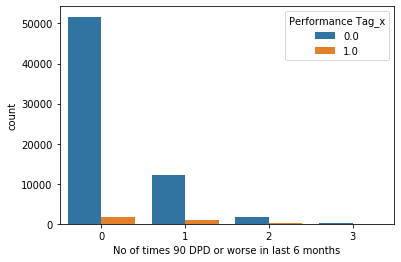

In [74]:
# Plotting No of times 90 DPD or worse in last 6 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 90 DPD or worse in last 6 months', hue = 'Performance Tag_x')
plt.show()

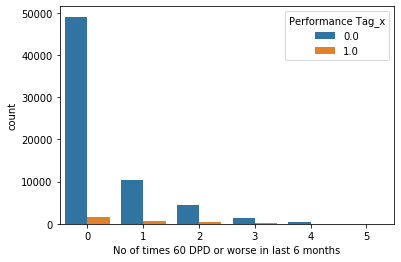

In [75]:
# Prospects have been given credit even after 90 DPD

# Plotting No of times 60 DPD or worse in last 6 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 60 DPD or worse in last 6 months', hue = 'Performance Tag_x')
plt.show()

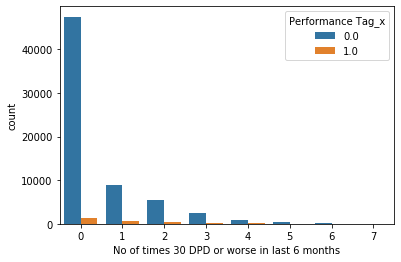

In [76]:
# Prospects have been given credit even after 60 DPD

# Plotting No of times 30 DPD or worse in last 6 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 30 DPD or worse in last 6 months', hue = 'Performance Tag_x')
plt.show()

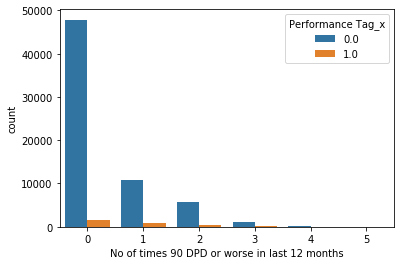

In [77]:
#Prospects have been given credit after 30 DPD

# Plotting No of times 90 DPD or worse in last 12 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 90 DPD or worse in last 12 months', hue = 'Performance Tag_x')
plt.show()

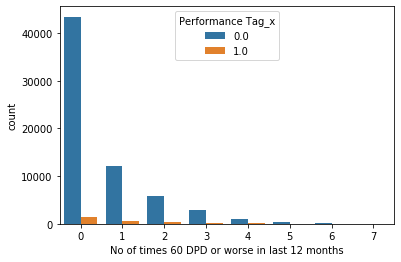

In [78]:
# Prospects have been given credit even after 90 DPD

# Plotting No of times 60 DPD or worse in last 12 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 60 DPD or worse in last 12 months', hue = 'Performance Tag_x')
plt.show()

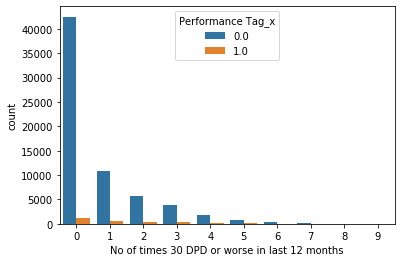

In [79]:
# Prospects have been given credit even after 60 DPD

# Plotting No of times 30 DPD or worse in last 12 months with Performance Tag
sns.countplot(data = woe_df, x = 'No of times 30 DPD or worse in last 12 months', hue = 'Performance Tag_x')
plt.show()

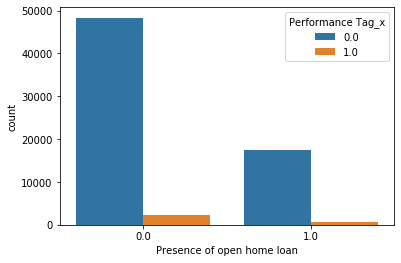

In [80]:
# Prospects have been given credit after 30 DPD

# Plotting Presence of open home loan with Performance Tag
sns.countplot(data = woe_df, x = 'Presence of open home loan', hue = 'Performance Tag_x')
plt.show()

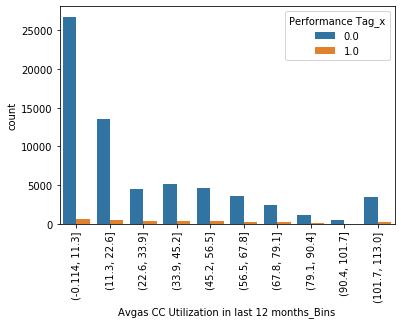

In [81]:
# Default is lower in prospects with open home loan

# Plotting Avgas CC Utilization in last 12 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='Avgas CC Utilization in last 12 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

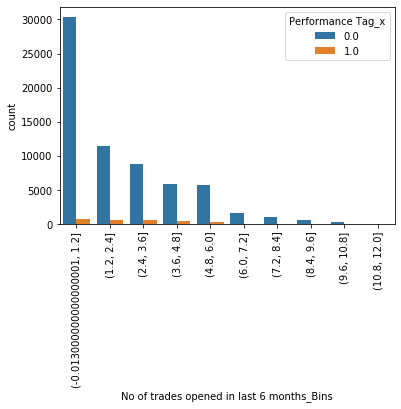

In [82]:
# Default decreases with decrease in CC utilization

# Plotting No of trades opened in last 6 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of trades opened in last 6 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

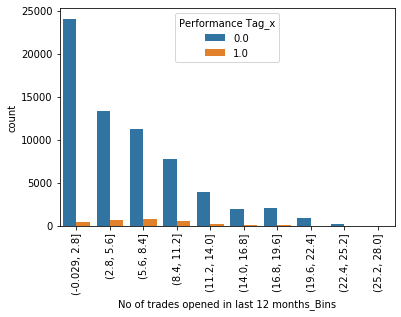

In [83]:
# Default decreases with decrease in trades opened

# Plotting No of trades opened in last 12 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of trades opened in last 12 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

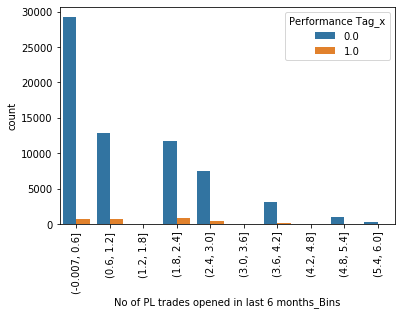

In [84]:
# Default decreases with decrease in trades opened

# Plotting No of PL trades opened in last 6 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of PL trades opened in last 6 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

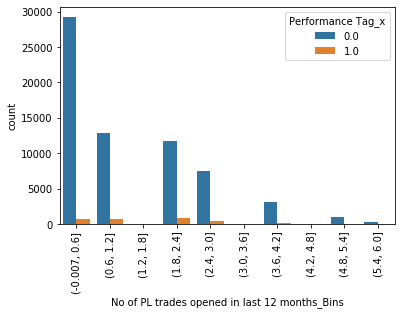

In [85]:
# Default decreases with decrease in PL trades opened

# Plotting No of PL trades opened in last 12 months_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of PL trades opened in last 12 months_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

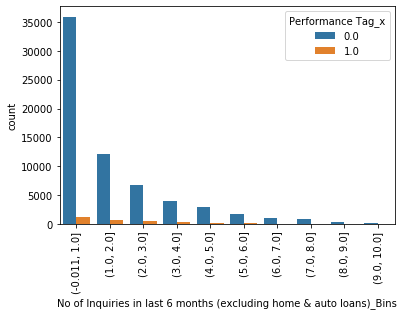

In [86]:
# Default decreases with decrease in PL trades opened

# Plotting No of Inquiries in last 6 months (excluding home & auto loans)_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of Inquiries in last 6 months (excluding home & auto loans)_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

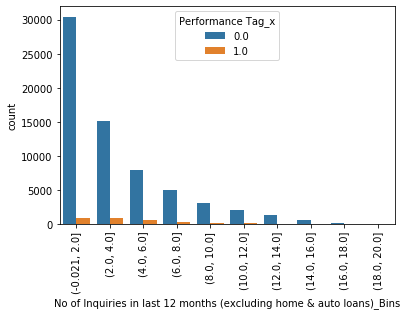

In [87]:
# Default decreases with decrease in inquiries

# Plotting No of Inquiries in last 12 months (excluding home & auto loans)_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='No of Inquiries in last 12 months (excluding home & auto loans)_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

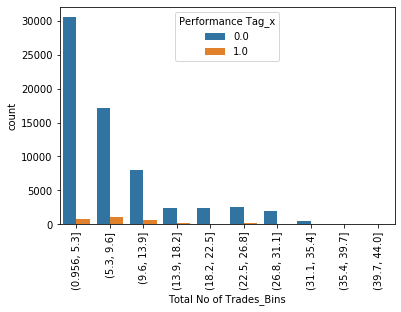

In [88]:
# Default decreases with decrease in inquiries

# Plotting Total no of Trades_Bins with Performance Tag_x
ax = sns.countplot(data = woe_df, x='Total No of Trades_Bins', hue = 'Performance Tag_x')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [89]:
# Default decreases with higher no of trades

final = merged.copy()
final.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,Presence of open auto loan,Performance Tag_y,Avgas CC Utilization in last 12 months_Bins,No of trades opened in last 6 months_Bins,No of trades opened in last 12 months_Bins,No of PL trades opened in last 6 months_Bins,No of PL trades opened in last 12 months_Bins,No of Inquiries in last 6 months (excluding home & auto loans)_Bins,No of Inquiries in last 12 months (excluding home & auto loans)_Bins,Total No of Trades_Bins
Application ID,,,,,,,,,,,,,,,,,,,,,
100450,52,M,Married,4.0,32.0,Professional,SE_PROF,Rented,79,3,...,0,0.0,"(101.7, 113.0]","(1.2, 2.4]","(5.6, 8.4]","(1.8, 2.4]","(1.8, 2.4]","(-0.011, 1.0]","(2.0, 4.0]","(5.3, 9.6]"
128993,36,M,Married,4.0,13.0,Professional,SAL,Rented,6,21,...,0,1.0,"(-0.114, 11.3]","(-0.013000000000000001, 1.2]","(5.6, 8.4]","(0.6, 1.2]","(0.6, 1.2]","(3.0, 4.0]","(6.0, 8.0]","(5.3, 9.6]"
142768,55,M,Married,1.0,29.0,Phd,SAL,Rented,46,3,...,0,0.0,"(33.9, 45.2]","(1.2, 2.4]","(5.6, 8.4]","(1.8, 2.4]","(1.8, 2.4]","(-0.011, 1.0]","(-0.021, 2.0]","(5.3, 9.6]"
176721,55,M,Married,3.0,53.0,Professional,SE_PROF,Rented,6,27,...,0,0.0,"(11.3, 22.6]","(-0.013000000000000001, 1.2]","(-0.029, 2.8]","(-0.007, 0.6]","(-0.007, 0.6]","(1.0, 2.0]","(2.0, 4.0]","(0.956, 5.3]"
197956,28,F,Married,3.0,35.0,Masters,SAL,Rented,6,43,...,0,0.0,"(-0.114, 11.3]","(6.0, 7.2]","(11.2, 14.0]","(4.8, 5.4]","(4.8, 5.4]","(5.0, 6.0]","(10.0, 12.0]","(22.5, 26.8]"


In [90]:
# Dropping all irrelavant columns
final.drop(['Age','Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ',
           'Type of residence','Presence of open auto loan','Performance Tag_y'], axis=1, inplace=True)

In [91]:
final.drop(['Age_bin','Income_bin','current_residence_bin','current_company_bin','Avgas CC Utilization in last 12 months_Bins',
           'No of trades opened in last 6 months_Bins','No of trades opened in last 12 months_Bins','No of PL trades opened in last 6 months_Bins',
           'No of PL trades opened in last 12 months_Bins','No of Inquiries in last 6 months (excluding home & auto loans)_Bins',
           'No of Inquiries in last 12 months (excluding home & auto loans)_Bins','Total No of Trades_Bins'], axis=1, inplace=True)

In [92]:
final.head()

,Income,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades
Application ID,,,,,,,,,,,,,,,,,,,,
100450,32.0,79,3,0.0,0,0,0,0,0,0,113.0,2.0,8,2,5,1,3,1.0,3903438.0,9
128993,13.0,6,21,1.0,1,1,2,1,1,2,9.0,1.0,6,1,4,4,7,0.0,741058.0,8
142768,29.0,46,3,0.0,0,1,1,1,1,1,34.0,2.0,7,2,4,1,2,0.0,815325.0,9
176721,53.0,6,27,0.0,0,0,0,0,0,0,18.0,0.0,1,0,1,2,3,0.0,209593.0,3
197956,35.0,6,43,0.0,0,0,0,0,0,0,3.0,7.0,13,5,5,6,11,0.0,992024.0,25


In [93]:
final.columns

Index(['Income', 'No of months in current residence',
       'No of months in current company', 'Performance Tag_x',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades'],
      dtype='object')

In [94]:
# Separating X and y data
X1 = final.drop(['Performance Tag_x'], axis=1)

y1 = final['Performance Tag_x']

In [95]:
# Splitting the data into train and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.7, test_size = 0.3, random_state=100)

In [96]:
X_train1.head()

,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades
Application ID,,,,,,,,,,,,,,,,,,,
829503039,4.5,6,28,0,0,0,0,0,0,8.0,6.0,11,2,4,7,8,0.0,795986.0,22
774668780,4.5,27,44,1,1,2,1,2,2,29.0,1.0,6,1,3,4,7,0.0,597049.0,6
958581394,37.0,6,7,0,0,0,0,0,0,7.0,1.0,4,1,1,1,1,0.0,223606.0,6
632073311,20.0,93,55,0,0,0,0,0,0,3.0,0.0,1,0,0,0,0,1.0,2984784.0,4
219276773,18.0,75,62,0,0,0,0,1,1,10.0,0.0,1,0,0,0,0,0.0,871.0,2


#### Scaling

In [97]:
# Scaling the train data
X_train1 = scaler.fit_transform(X_train1)

In [98]:
X_test1 = scaler.transform(X_test1)

### Modelling

In [99]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
# Logistic regression model
logm2 = sm.GLM(y_train1,(sm.add_constant(X_train1)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_x   No. Observations:                47999
Model:                            GLM   Df Residuals:                    47979
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8033.0
Date:                Sun, 01 Mar 2020   Deviance:                       16066.
Time:                        22:55:33   Pearson chi2:                 4.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2840      0.026   -125.847      0.000      -3.335      -3.233
x1            -0.0528      0.024     -2.157      0.031      -0.101      -0.005
x2            -0.0388      0.025     -1.544      0.123      -0.088       0.010
x3            -0.0578      0.023     -2.473      0.013      -0.104      -0.012
x4            -0.0420      0.048     -0.876      0.381      -0.136       0.052
x5            -0.1313      0.079     -1.667      0.096      -0.286       0.023
x6             0.1585      0.086      1.851      0.064      -0.009       0.326
x7             0.1363      0.043      3.151      0.002       0.052       0.221
x8            -0.0074      0.056     -0.131      0.896      -0.118       0.103
x9             0.0970      0.068      1.427      0.153      -0.036       0.230
x10            0.2167      0.025      8.635      0.000       0.168       0.266
x11           -0.0368      0.078     -0.473      0.636      -0.189       0.116
x12            0.0392      0.144      0.273      0.785      -0.243       0.321
x13            0.1586      0.059      2.707      0.007       0.044       0.273
x14            0.3401      0.147      2.309      0.021       0.051       0.629
x15           -0.0859      0.050     -1.702      0.089      -0.185       0.013
x16            0.2407      0.058      4.156      0.000       0.127       0.354
x17            0.5403      0.343      1.576      0.115      -0.132       1.212
x18           -0.5704      0.350     -1.628      0.103      -1.257       0.116
x19           -0.1547      0.083     -1.874      0.061      -0.316       0.007
==============================================================================
"""

### PCA

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [102]:
pca = PCA()
pca.fit(X_train1)
churn_pca = pca.fit_transform(X_train1)

In [103]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      36.81
1      61.21
2      71.31
3      77.43
4      83.06
5      87.29
6      90.90
7      94.26
8      95.91
9      96.73
10     97.48
11     98.13
12     98.70
13     99.12
14     99.45
15     99.76
16     99.89
17     99.99
18    100.00
dtype: float64


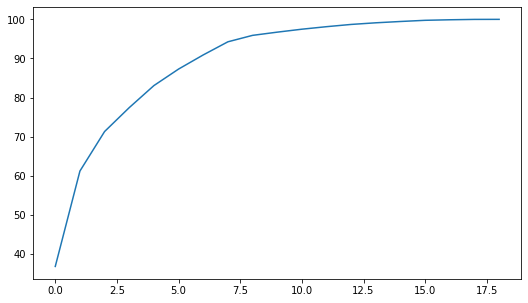

In [104]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [105]:
# create pipeline
PCA_VARS = 6
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [106]:
# fit model
pipeline.fit(X_train1, y_train1)

# check score on train data
pipeline.score(X_train1, y_train1)

0.5967624325506782

In [107]:
# predict churn on test data
y_pred1 = pipeline.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob1 = pipeline.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob1),2))

[[11738  7959]
 [  310   564]]
Sensitivity: 	0.65
Specificity: 	0.6
AUC:    	 0.66


In [108]:
# class imbalance
y_train1.value_counts()/y_train1.shape

0.0    0.957937
1.0    0.042063
Name: Performance Tag_x, dtype: float64

In [109]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [5,6,7,8,9,10,11,12,13,14,15,16,17,18], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [110]:
# fit model
model.fit(X_train1, y_train1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_sca...
                                       

In [111]:
# Best Paramters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6677593159722017
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 14}


In [112]:
# predict churn on test data
y_pred1 = model.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob1 = model.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob1),2))

[[11564  8133]
 [  284   590]]
Sensitivity: 	0.68
Specificity: 	0.59
AUC:    	 0.67


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.59      0.73     19697
         1.0       0.07      0.68      0.12       874

    accuracy                           0.59     20571
   macro avg       0.52      0.63      0.43     20571
weighted avg       0.94      0.59      0.71     20571



#### Random Forest

In [118]:
#class weight to handle class imbalance
forest = RandomForestClassifier(class_weight='balanced_subsample')

# hyperparameter space
params = {'max_depth':[6,10], 'min_samples_leaf':range(50,75),
         'min_samples_split':range(50,75),
         'n_estimators':[150,200], 'max_features':[6,8,10]}

# create gridsearch object
rf = GridSearchCV(estimator=forest, cv=3, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
rf.fit(X_train1, y_train1)

Fitting 3 folds for each of 7500 candidates, totalling 22500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.7min


In [ ]:
# print best hyperparameters
print("Best AUC: ", rf.best_score_)
print("Best hyperparameters: ", rf.best_params_)

In [117]:
# Model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced_subsample',
                            max_depth=10,
                            max_features=20,
                            min_samples_leaf=50,
                            min_samples_split=50,
                            n_estimators=200)

In [ ]:
# fit
rfc.fit(X_train1,y_train1)

In [ ]:
predictions = rfc.predict(X_test1)

In [ ]:
# Evaluation metrics
print(classification_report(y_test,predictions))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [ ]:
# predictors
features = X_train1.columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

In [ ]:
#top features
top_features = feature_importance.variables[0:10]
print(top_features)